# 常态分配(Normal Distribution)

## 平均数的机率

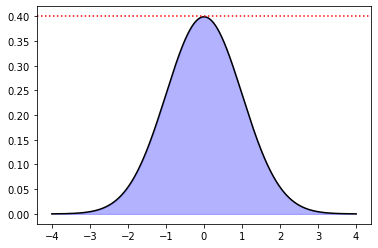

In [8]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 观察值范围
z1, z2 = -4, 4

# 样本点
x = np.arange(z1, z2, 0.001) 
y = norm.pdf(x,0,1)

# 绘图
plt.plot(x,y,'black')

# 对平均数的pdf画虚线
plt.axhline(.4, c='r', linestyle=':')

# 填色
plt.fill_between(x,y,0, alpha=0.3, color='b')
plt.show()

## 常态分配的各种信赖区间

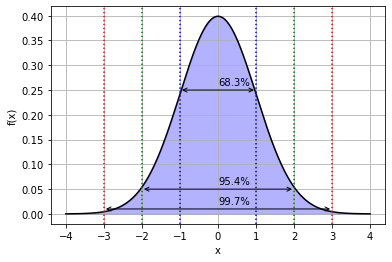

In [9]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 观察值范围
z1, z2 = -4, 4

# 样本点
x = np.arange(z1, z2, 0.001) 
y = norm.pdf(x,0,1)

# 绘图
plt.plot(x,y,'black')


# 设定图形属性
plt.xlabel('x')
plt.ylabel('f(x)')
plt.grid()

# 对正负1、2、3倍标准差画虚线
plt.axvline(-3, c='r', linestyle=':')
plt.axvline(3, c='r', linestyle=':')
plt.axvline(-2, c='g', linestyle=':')
plt.axvline(2, c='g', linestyle=':')
plt.axvline(-1, c='b', linestyle=':')
plt.axvline(1, c='b', linestyle=':')

# 1 倍标准差机率
plt.annotate(text='', xy=(-1,0.25), xytext=(1,0.25), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='68.3%', xy=(0,0.26), xytext=(0,0.26))
# 2 倍标准差机率
plt.annotate(text='', xy=(-2,0.05), xytext=(2,0.05), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='95.4%', xy=(0,0.06), xytext=(0,0.06))
# 3 倍标准差机率
plt.annotate(text='', xy=(-3,0.01), xytext=(3,0.01), arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='99.7%', xy=(0,0.02), xytext=(0,0.02))

# 填色
plt.fill_between(x,y,0, alpha=0.3, color='b')
plt.show()

## 范例1. 以美国历届总统的身高资料，计算各式描述统计量及95%的信赖区间。

In [10]:
import random 
import pandas as pd
import numpy as np

# 读取档案
df = pd.read_csv('./data/president_heights.csv')
df.rename(columns={df.columns[-1]:'height'}, inplace=True)

# 计算信赖区间
m = df['height'].mean()
sd = df['height'].std()
print(f'平均数={m}, 标准差={sd}, 信赖区间=({m-2*sd}, {m+2*sd})')

平均数=179.73809523809524, 标准差=7.015868855358296, 信赖区间=(165.70635752737866, 193.76983294881182)


## 范例2. 利用随机乱数产生常态分配的样本，再使用SciPy的统计模组(stats)计算信赖区间

In [11]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import norm

# 产生随机乱数的样本
mu = 5     # 平均数
sigma = 2  # 标准差
n = 10000  # 样本数
data = np.random.normal(mu, sigma, n)

cl = .95   #信赖水准(Confidence Level)

# 计算信赖区间
m = data.mean()
sd = data.std()
y1 = norm.interval(cl, m, sd)
print(f'平均数={m}, 标准差={sd}, 信赖区间={y1}')

平均数=4.964170374167073, 标准差=1.9929401330404837, 信赖区间=(1.0580794900632609, 8.870261258270885)


C:\Users\Ariel\anaconda3\lib\site-packages\seaborn\distributions.py:2551: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)


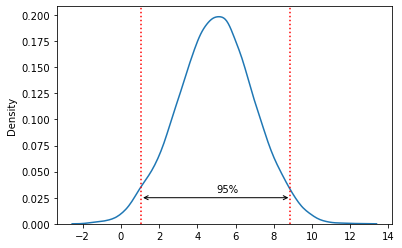

In [12]:
import seaborn as sns

# 直方图，参数 hist=False：不画阶梯直方图，只画平滑曲线
sns.distplot(data, hist=False)

# 画信赖区间
plt.axvline(y1[0], c='r', linestyle=':')
plt.axvline(y1[1], c='r', linestyle=':')

# 标示 95%
plt.annotate(text='', xy=(y1[0],0.025), xytext=(y1[1],0.025), 
             arrowprops=dict(arrowstyle='<->'))
plt.annotate(text='95%', xy=(mu,0.03), xytext=(mu,0.03))

plt.show()

## 范例3. 利用随机乱数产生二项分配的样本，再使用SciPy的统计模组(stats)计算信赖区间

In [13]:
import matplotlib.pyplot as plt
import numpy as np
from scipy.stats import binom

# 产生随机乱数的样本
trials = 1  # 实验次数
p = 0.5     # 出现正面的机率
n = 10000   # 样本数
data = np.random.binomial(trials, p, n)

cl = .95   #信赖水准(Confidence Level)

# 计算信赖区间
m = data.mean()
sd = data.std()
y1 = binom.interval(cl, n, m)
print(f'平均数={m}, 标准差={sd}, 信赖区间={y1}')

平均数=0.4909, 标准差=0.49991718314136796, 信赖区间=(4811.0, 5007.0)


In [14]:
(p*(1-p))**.5

0.5